# Проект по А/B-тестированию

###  Описание проекта

**Цель проекта** — провести оценку результатов A/B-теста основе датасета с действиями пользователей, технического задания и нескольких вспомогательных датасетов.

Для этого требуется выполнить **следующие шаги**:
- Загрузить данные и изучить общую информацию о датасете;
- Выполнить предобработку данных;
- Оценить корректность проведения теста;
- Провести исследовательский анализ данных;
- Провести оценку результатов A/B-тестирования;
- Проанализировать результаты теста.

**1. Загрузка данных**

**2. Предобработка данных:**
- Преобразование типов данных (при необходимости);
- Выявление и удаление дубликатов, в том числе неявных (при необходимости);
- Выявление и удаление/заполнение пропусков (при необходимости);

**3. Оценка корректности проведения теста:**
- Проверить соответствие данных требованиям технического задания и корректность всех пунктов технического задания;
- Убедиться, что время проведения теста не совпадает с маркетинговыми и другими активностями;
- Обратить внимание на аудиторию теста: удостовериться, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно; проверить равномерность распределения пользователей по тестовым группам и правильность их формирования;

**4. Исследовательский анализ данных:**
- Определить  одинаково ли распределены количество событий на пользователя в выборках;
- Выяснить как число событий в выборках распределено по дням;
- Определить, как меняется конверсия в воронке в выборках на разных этапах;
- Выявить какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию;

**5. Оценка результатов A/B-тестирования:**
- Описать результаты A/B-тестирования;
- Проверить статистическую разницу долей z-критерием;

**6. Анализ результатов теста:**
- Написать выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования;
- Написать общее заключение о корректности проведения теста.


**Техническое задание**
- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

## Загрузка данных и изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import math
from scipy import stats 

In [2]:
# сохранение таблицы csv в переменные
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv') 

new_users = pd.read_csv('/datasets/final_ab_new_users.csv')

events = pd.read_csv('/datasets/final_ab_events.csv')

participants = pd.read_csv('/datasets/final_ab_participants.csv')

In [3]:
# вывод таблицы
marketing_events.head(5)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [4]:
# вывод информации о датасете
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Датасет `marketing_events` содержит календарь маркетинговых событий на 2020 год - 14 строк и 4 колонки:
- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.
    
Столбцы с датами необходимой преобразовать в тип времени datetime.
    
</div>

In [5]:
# вывод пяти строк датасета
new_users.head(5)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [6]:
# вывод информации о датасете
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


<div class="alert alert-info">
    
**📝 Комментарий Маши**

Датасет `new_users` содержит информацию о пользователях - 61733 строк и 4 колонки:
- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.
    
Столбец с датами необходимой преобразовать в тип времени datetime.
</div>

In [7]:
# вывод пяти строк датасета
events.head(5)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [8]:
# вывод информации о датасете
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


<div class="alert alert-info">
    
**📝 Комментарий Маши**

Датасет `events` содержит информацию о действиях новых пользователей в период с 7 декабря 2020 по 4 января 2021 года - 440317 строк и 4 колонки:
- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время события;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, `purchase,` в этом поле хранится стоимость покупки в долларах.
    
Столбец с датами необходимой преобразовать в тип времени datetime.
</div>

In [9]:
# вывод пяти строк датасета
participants.head(5)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [10]:
# вывод информации о датасете
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


<div class="alert alert-info">
    
**📝 Комментарий Маши**

Датасет `participants` - таблица участников тестов из 18268 строк и 3 колонок:
- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.
</div>

## Предобработка данных

- Выявление дубликатов и пропусков;

In [11]:
# вывод стат. показателей датасета
display('Статистические показатели marketing_events:', marketing_events.describe())

# подсчет дубликатов
display('Дубликаты:', marketing_events.duplicated().sum()) 

# подсчет пропусков
display('Пропущенные значения:', marketing_events.isna().sum()) 

'Статистические показатели marketing_events:'

,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,Easter Promo,APAC,2020-12-30,2020-03-10
freq,1,4,1,1


'Дубликаты:'

0

'Пропущенные значения:'

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Датасет `marketing_events` не содержит дубликатов и пропусков.
    
</div>

In [12]:
# вывод стат. показателей датасета
display('Статистические показатели new_users:', new_users.describe())

# подсчет дубликатов
display('Дубликаты:', new_users.duplicated().sum()) 

# подсчет пропусков
display('Пропущенные значения:', new_users.isna().sum()) 

'Статистические показатели new_users:'

,user_id,first_date,region,device
count,61733,61733,61733,61733
unique,61733,17,4,4
top,B8F5A3560F2DF46E,2020-12-21,EU,Android
freq,1,6290,46270,27520


'Дубликаты:'

0

'Пропущенные значения:'

user_id       0
first_date    0
region        0
device        0
dtype: int64

<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
Датасет `new_users` не содержит дубликатов и пропусков.

</div>

In [13]:
# вывод стат. показателей датасета
display('Статистические показатели new_users:', events.describe())

# подсчет дубликатов
display('Дубликаты:', events.duplicated().sum()) 

# подсчет пропусков
display('Пропущенные значения:', events.isna().sum()) 

'Статистические показатели new_users:'

,details
count,62740.000000
mean,23.877631
std,72.180465
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


'Дубликаты:'

0

'Пропущенные значения:'

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

In [14]:
# убедимся, что пропуски в details - только стоимость покупки
events.groupby('event_name')['details'].agg('mean').reset_index() 

,event_name,details
0,login,NaN
1,product_cart,NaN
2,product_page,NaN
3,purchase,23.877631


<div class="alert alert-info">
    
**📝 Комментарий Маши**
    
В датасете `events` нет дубликатов, но есть 377577 пропусков в столбце `details`. Но т.к. данный столбец является дополнительным и содержит только стоимость покупки для события `purchase`, то нет смысла заполнять его пропуски - оставим, как есть.

</div>

In [15]:
# вывод стат. показателей датасета
display('Статистические показатели new_users:', participants.describe())

# подсчет дубликатов
display('Дубликаты:', participants.duplicated().sum()) 

# подсчет пропусков
display('Пропущенные значения:', participants.isna().sum()) #подсчет пропусков

'Статистические показатели new_users:'

,user_id,group,ab_test
count,18268,18268,18268
unique,16666,2,2
top,B3D8D3BB3ED8F850,A,interface_eu_test
freq,2,9655,11567


'Дубликаты:'

0

'Пропущенные значения:'

user_id    0
group      0
ab_test    0
dtype: int64

<div class="alert alert-info">
    
**📝 Комментарий Маши**

Датафрейм `participants` не содержит дубликатов и пропусков.

</div>

- Преобразование типов данных;

In [16]:
# преобразуем формат даты и времени в столбцах
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'], format='%Y-%m-%d')

marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'], format='%Y-%m-%d')

new_users['first_date'] = pd.to_datetime(new_users['first_date'], format='%Y-%m-%d')

events['event_dt'] = pd.to_datetime(events['event_dt'], format='%Y-%m-%d %H:%M:%S')


<div class="alert alert-info">
    
**📝 Комментарий Маши**

Все колонки с информацией о датах привели из строкового типа во временной.

</div>

## Оценка корректности проведения теста:

- Проверить соответствие данных требованиям технического задания и корректность всех пунктов технического задания;


In [17]:
# оценим группировку значений по тесту и группе теста
participants.groupby(['ab_test', 'group'])['user_id'].agg('nunique')

ab_test                  group
interface_eu_test        A        5831
                         B        5736
recommender_system_test  A        3824
                         B        2877
Name: user_id, dtype: int64

<div class="alert alert-info">
    
**📝 Комментарий Маши**

В датасете присутствуют данные по двум разным тестам. Согласно ТЗ, работаем только с одним - recommender_system_test. Но удалять данные по тесту interface_eu_test не будем.

</div>

In [18]:
# посмотрим на самую раннюю и позднюю даты набора пользователей
display('min дата:',  new_users['first_date'].min())
display('max дата:',  new_users['first_date'].max())

'min дата:'

Timestamp('2020-12-07 00:00:00')

'max дата:'

Timestamp('2020-12-23 00:00:00')

In [19]:
# создадим новый датасет с набором пользователей до 21 декабря 2020
new_users = new_users.query('first_date != ["2020-12-22", "2020-12-23"]')

<div class="alert alert-info">
    
**📝 Комментарий Маши**

Согласно ТЗ:
- дата запуска 7 декабря 2020 (совпадает с мин.датой)
- дата остановки набора новых пользователей: 21 декабря 2020, поэтому необходимо удалить строки с более поздними датами(с 22-23 декабря 2020)

</div>

In [20]:
# посмотрим на самую раннюю и позднюю даты событий
display('min дата:',  events['event_dt'].min())
display('max дата:',  events['event_dt'].max())

'min дата:'

Timestamp('2020-12-07 00:00:33')

'max дата:'

Timestamp('2020-12-30 23:36:33')

<div class="alert alert-info">
    
**📝 Комментарий Маши**

Согласно ТЗ:
- дата остановки тестирования - 4 января 2021. 

Т.к. последняя дата событий в таблице - 30 декабря 2020. Оставляем, как есть.

</div>

In [21]:
# посчитаем кол-во пользователей в регионах
new_users['region'].value_counts()

EU           42340
N.America     8347
CIS           2900
APAC          2883
Name: region, dtype: int64

In [22]:
#оставляем в датасете только пользователей из Европы согласно ТЗ
users_eu = new_users.query('region == "EU"').reset_index(drop=True)

users_eu

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,2E1BF1D4C37EA01F,2020-12-07,EU,PC
2,50734A22C0C63768,2020-12-07,EU,iPhone
3,8942E64218C9A1ED,2020-12-07,EU,PC
4,FFCEA1179C253104,2020-12-07,EU,Android
...,...,...,...,...
42335,1DB53B933257165D,2020-12-20,EU,Android
42336,538643EB4527ED03,2020-12-20,EU,Mac
42337,7ADEE837D5D8CBBD,2020-12-20,EU,PC
42338,1C7D23927835213F,2020-12-20,EU,iPhone


<div class="alert alert-info">
    
**📝 Комментарий Маши**

Согласно ТЗ:
- аудитория: 15% новых пользователей из региона EU;

</div>

-	Обратить внимание на аудиторию теста: удостовериться, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно; проверить равномерность распределения пользователей по тестовым группам и правильность их формирования;


In [23]:
# соберем один универсальный датафрейм (к пользователям из Европы присоединяем участников теста и удаляем пропущ.зн.)
ab_data = users_eu.merge(participants, on='user_id', how='left').dropna().reset_index(drop=True)

ab_data

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test
2,50734A22C0C63768,2020-12-07,EU,iPhone,B,interface_eu_test
3,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test
4,E6DE857AFBDC6102,2020-12-07,EU,PC,B,interface_eu_test
...,...,...,...,...,...,...
16911,27007FC1A9B62FC5,2020-12-20,EU,iPhone,B,interface_eu_test
16912,89CB0BFBC3F35126,2020-12-20,EU,PC,B,recommender_system_test
16913,75F25D4DADA37ABB,2020-12-20,EU,Android,B,interface_eu_test
16914,2C29721DDDA76B2A,2020-12-20,EU,iPhone,B,interface_eu_test


<div class="alert alert-info">
    
**📝 Комментарий Маши**

Определили целевую аудиторию в таблице `ab_data`

</div>

In [24]:
# как распределились пользователи по тесту
ab_data.groupby('ab_test')['user_id'].agg('count') 

ab_test
interface_eu_test          10565
recommender_system_test     6351
Name: user_id, dtype: int64

<div class="alert alert-info">
    
**📝 Комментарий Маши**

Участников теста `interface_eu_test` из Европы - 10565

Участников теста `recommender_system_tes` из Европы - 6351

</div>

In [25]:
# к таблице с пользователями присоединяем участников тестов и отбрасываем пропущ. значения
users_total = new_users.merge(participants, on='user_id', how='left').dropna().reset_index(drop=True) 

In [26]:
# распределение по регионам
ch = users_total.query('ab_test == "recommender_system_test"')
ch = ch.groupby('region')['ab_test'].agg('count').reset_index()
ch

,region,ab_test
0,APAC,72
1,CIS,55
2,EU,6351
3,N.America,223


In [27]:
# определение кол-ва пользователей
display('Всего пользователей:', ch['ab_test'].sum()) 

'Всего пользователей:'

6701

In [28]:
# построение круговой диаграммы с процентами по каждому региону
fig = go.Figure(data=[go.Pie(labels=ch['region'], 
                             values=ch['ab_test'], 
                             pull = [0.1, 0])]) 

# оформление графика
# fig.update_layout(title='Распределение пользователей теста "Recommender_system_test" по регионам', 
                  # width=800, 
                  # height=600) 

#вывод графика
# fig.show() 

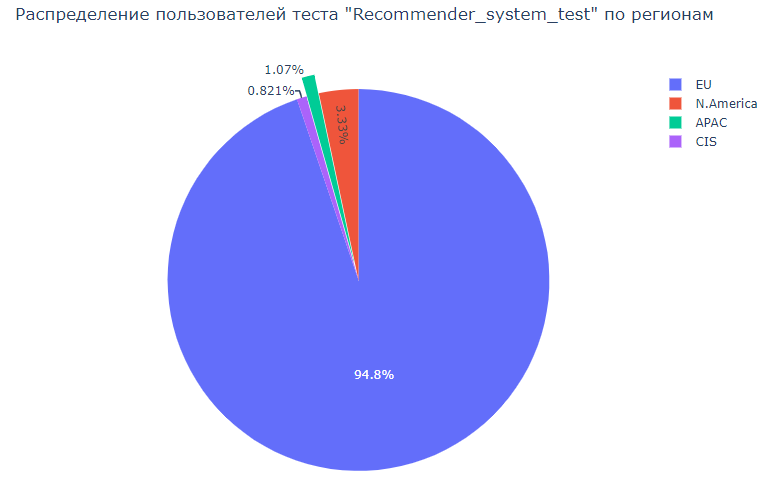

<div class="alert alert-info">
    
**📝 Комментарий Маши**

Участников теста `interface_eu_test` - 10565
Участников теста `recommender_system_test` - 6351

Всего пользователей теста `recommender_system_test` со всех регионов - 6701, подавляющее большинство из Европы (94,8%).

</div>

In [29]:
# таблица с количество тестов, в которых принимал участие каждый пользователь
two_tests_users = ab_data.groupby('user_id', as_index=False)['ab_test'].agg('nunique')

# переименуем столбец
two_tests_users = two_tests_users.rename(columns={'ab_test': 'number'})

# выведем таблицу
two_tests_users

,user_id,number
0,0002CE61FF2C4011,1
1,000ABE35EE11412F,1
2,001064FEAAB631A1,2
3,0010A1C096941592,1
4,001C05E87D336C59,1
...,...,...
15309,FFE858A7845F005E,1
15310,FFED90241D04503F,2
15311,FFEFC0E55C1CCD4F,1
15312,FFF28D02B1EACBE1,2


In [30]:
# пользователи, которые участвовали только в тесте recommender_system_test
rstest_users = ab_data.query('ab_test == "recommender_system_test"')

# выведем таблицу
rstest_users

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
3,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test
7,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test
10,831887FE7F2D6CBA,2020-12-07,EU,Android,A,recommender_system_test
12,4CB179C7F847320B,2020-12-07,EU,iPhone,B,recommender_system_test
...,...,...,...,...,...,...
16903,A09DFE27D4CFF8E8,2020-12-20,EU,Android,B,recommender_system_test
16907,0F7D49FC184EDCDE,2020-12-20,EU,PC,A,recommender_system_test
16909,574ACBC674BC385D,2020-12-20,EU,Mac,A,recommender_system_test
16910,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test


In [31]:
#к таблице с пользователям нашего теста присоединяем кол-во тестов пользователя
rstest_users = rstest_users.merge(two_tests_users, on='user_id', how='left')

# выведем таблицу
rstest_users

,user_id,first_date,region,device,group,ab_test,number
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,1
1,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test,2
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2
3,831887FE7F2D6CBA,2020-12-07,EU,Android,A,recommender_system_test,1
4,4CB179C7F847320B,2020-12-07,EU,iPhone,B,recommender_system_test,1
...,...,...,...,...,...,...,...
6346,A09DFE27D4CFF8E8,2020-12-20,EU,Android,B,recommender_system_test,2
6347,0F7D49FC184EDCDE,2020-12-20,EU,PC,A,recommender_system_test,1
6348,574ACBC674BC385D,2020-12-20,EU,Mac,A,recommender_system_test,1
6349,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,1


In [32]:
# участники двух тестов
len(rstest_users.query('number == 2')) 

1602

In [33]:
# общее кол-во участников
len(rstest_users) 

6351

In [34]:
# доля участников теста относительно всех новых пользователей Европы
len(rstest_users)/len(new_users.query('region == "EU"')) * 100 

15.0

<div class="alert alert-info">
    
**📝 Комментарий Маши**

1602 (из 6351) участников теста `recommender_system_test` участвовали и в другом тесте. Их отбросим, и в дальнейшем не будем рассматривать, т.к. они могут повлиять на конечные результаты.
    
В тесте участвуют 15% новых пользователей региона EU, совпадает с ТЗ.

</div>

In [35]:
# таблица событий пользователей нашей выборки
ab_events = events[events['user_id'].isin(rstest_users['user_id'])].reset_index(drop=True)

# количество событий пользователей, входящими в выборку теста
len(ab_events) 

23420

In [36]:
# выведем таблицу
ab_events

,user_id,event_dt,event_name,details
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
1,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99
2,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99
3,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99
4,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99
...,...,...,...,...
23415,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,NaN
23416,96BDD55846D1F7F6,2020-12-29 16:53:42,login,NaN
23417,553BAE96C6EB6240,2020-12-29 14:09:14,login,NaN
23418,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,NaN


In [37]:
# объединение таблицы с событиями с данными пользователей теста
ab_events = ab_events.merge(rstest_users, on='user_id', how='inner') 

In [38]:
# выведем таблицу
ab_events

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test,number
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A,recommender_system_test,1
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,A,recommender_system_test,1
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,2020-12-07,EU,Android,A,recommender_system_test,1
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,2020-12-07,EU,Android,A,recommender_system_test,1
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,2020-12-07,EU,Android,A,recommender_system_test,1
...,...,...,...,...,...,...,...,...,...,...
23415,1484BBF124DB1B18,2020-12-27 10:53:34,login,NaN,2020-12-21,EU,PC,A,recommender_system_test,1
23416,BEF16764A13AEC34,2020-12-21 03:49:49,login,NaN,2020-12-21,EU,PC,B,recommender_system_test,2
23417,BEF16764A13AEC34,2020-12-22 18:52:25,login,NaN,2020-12-21,EU,PC,B,recommender_system_test,2
23418,BEF16764A13AEC34,2020-12-24 22:11:00,login,NaN,2020-12-21,EU,PC,B,recommender_system_test,2


In [39]:
# кол-во участников, совершивших события
len(ab_events['user_id'].unique()) 

3481

<div class="alert alert-info">
    
**📝 Комментарий Маши**

Количество уникальных пользователей в таблице событий - 3481.

</div>

- Определить, как меняется конверсия в воронке в выборках на разных этапах;

In [40]:
# колонка с лайфтаймом
ab_events['lifetime'] = (ab_events['event_dt'] - ab_events['first_date']).dt.days 

# оставляем события, совершенные в течение 14 дней с момента регистрации
ab_events = ab_events.query('lifetime <= 14') 


In [41]:
# таблица для построения воронки 
funnel = ab_events.pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique').reindex(['login', 'product_page', 'product_cart', 'purchase'])

# колонка с общим кол-вом пользователей
funnel['total'] = funnel.sum(axis=1) 

In [42]:
# построение воронки с конверсией
fig = go.Figure()
# fig.add_trace(go.Funnel(
    # name = 'A',
    # y = funnel['A'].index,
    # x = funnel['A'].values,
    # textinfo = "value+percent previous"))
# fig.add_trace(go.Funnel(
    # name = 'B',
    # y = funnel['B'].index,
    # x = funnel['B'].values,
    # textinfo = "value+percent previous"))
# fig.update_layout(
    # title = 'Продуктовая воронка с конверсией к предыдущему шагу')
# fig.show()

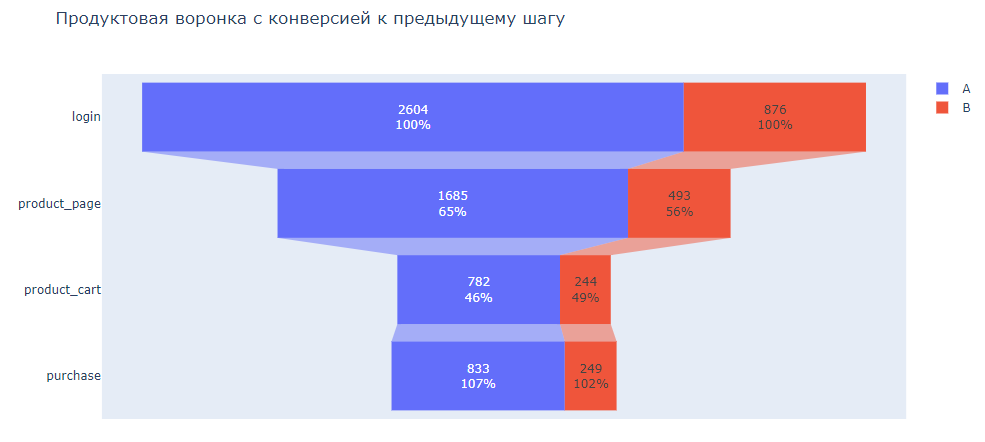

<div class="alert alert-info">
    
**📝 Комментарий Маши**

Варианты действий:

- login - регистрация пользователя
- product_page - посещение страницы с товаром
- product_cart - добавление товара в корзину
- purchase - заказ
    
Некоторые пользователи пропускали шаг "добавление товара в корзину" и переходили с "посещение страницы с товаром" к "заказу". Скорее всего, благодаря опции "быстрая покупка".


</div>

In [43]:
# конверсия в группе А
funnel.loc['purchase', 'A']/funnel.loc['login', 'A'] * 100 

31.989247311827956

In [44]:
# конверсия в группе В
funnel.loc['purchase', 'B']/funnel.loc['login', 'B'] * 100 

28.424657534246577

In [45]:
# отношение конверсии группы В к группе А
(funnel.loc['purchase', 'B']/funnel.loc['login', 'B']) / (funnel.loc['purchase', 'A']/funnel.loc['login', 'A']) *100

88.85691262806493

<div class="alert alert-info">
    
**📝 Комментарий Маши**

Конверсия залогинившихся пользователей в покупки в группе А составляет: 31.99%
    
Конверсия залогинившихся пользователей в покупки в группе B составляет: 28.42%
    
Отношение конверсии в покупки в группе В к группе А: 88.86%
    
Ождиаемый эффект по ТЗ: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%. По результатам, это не случилось.


</div>

## Исследовательский анализ данных

- Определить одинаково ли распределены количество событий на пользователя в выборках;

In [46]:
# среднее количество событий на пользователа по группам 
event_by_user_id = ab_events.groupby(['user_id', 'group'])['event_name'].agg('count').reset_index()

# вывод таблицы
event_by_user_id

,user_id,group,event_name
0,001064FEAAB631A1,B,6
1,0010A1C096941592,A,12
2,00341D8401F0F665,A,2
3,003DF44D7589BBD4,A,15
4,00505E15A9D81546,A,5
...,...,...,...
3476,FF5B24BCE4387F86,A,9
3477,FF825C1D791989B5,A,8
3478,FF8CF7057415EB29,B,4
3479,FFAE9489C76F352B,A,6


In [47]:
# события пользователей группы А
event_by_user_id_A = event_by_user_id.query('group == "A"')

# среднее количество событий на пользователя группы А
event_by_user_id_A['event_name'].sum() / event_by_user_id_A['user_id'].count() 

6.903609831029186

In [48]:
# события пользователей группы В
event_by_user_id_B = event_by_user_id.query('group == "B"')

# среднее количество событий на пользователя группы В
event_by_user_id_B['event_name'].sum() / event_by_user_id_B['user_id'].count()

5.531356898517674

<div class="alert alert-info">
    
**📝 Комментарий Маши**

Среднее количество событий на пользователя в группе А: 7
    
Среднее количество событий на пользователя в группе B: 6
   
</div>

- Выяснить как число событий в выборках распределено по дням;

In [49]:
# календарь маркетинговых активностей
marketing_events 

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [50]:
# маркетинговые актвности, пересекающиеся с периодом теста
marketing_events.query('"2020-11-30" <= start_dt <= "2021-01-04"') 

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


<div class="alert alert-info">
    
**📝 Комментарий Маши**

Две активности пересекаются с датой проведения теста - Christmas&New Year Promo и CIS New Year Gift Lottery	
</div>

In [51]:
# построение гистограммы по общему кол-ву заказов
fig = px.histogram(ab_events, x='event_dt', y='user_id', barmode = 'overlay', color='group', title = 'Распределение количества событий пользователей по времени в группах', histfunc='count', \
             labels={'event_dt':'дата', 'count':'количество событий'}) 

# установка расстояния между столбцами
# fig.update_layout(bargap=0.2) 

# вывод графика
# fig.show() 

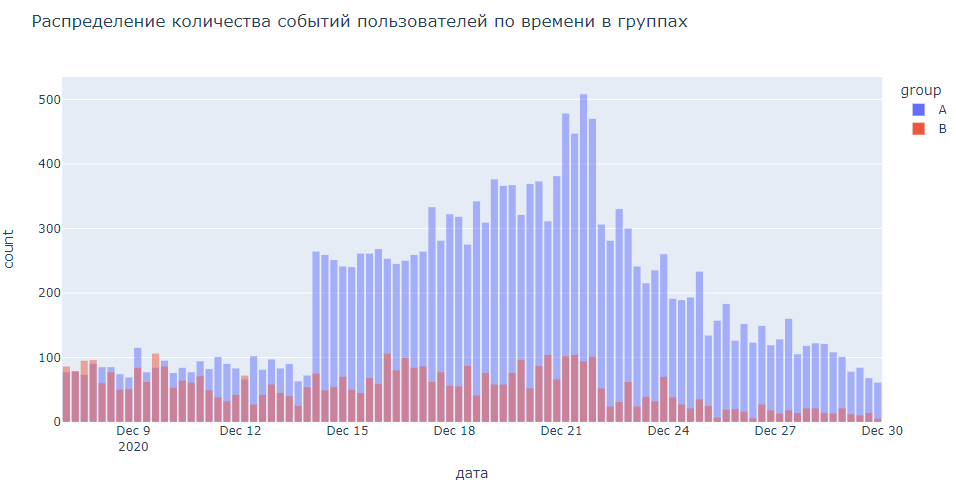

<div class="alert alert-info">
    
**📝 Комментарий Маши**

По графику видно, что в период рождественской маркетинговой активности наблюдается рост продаж.
    
Группа А существенно преобладает кол-вом событий над группой В. Хотя в первые дни теста наблюдается схожее кол-во. Затем группа А сделала резкий скачок в предрождественские дни, после пошло на спад с 21 декабря.
    
    
</div>

## Оценка результатов A/B-тестирования

- Подготовка данных для A/B-тестирования

In [52]:
# таблица с воронкой
funnel 

group,A,B,total
event_name,,,
login,2604,876,3480
product_page,1685,493,2178
product_cart,782,244,1026
purchase,833,249,1082


In [53]:
# транспонируем таблицу с воронкой
funnel_ab = funnel.transpose() 
funnel_ab

event_name,login,product_page,product_cart,purchase
group,,,,
A,2604,1685,782,833
B,876,493,244,249
total,3480,2178,1026,1082


- Описать результаты A/B-тестирования;

*Нулевая гипотеза* - есть cтатистически значимые различия в событиях между группами А и В.

*Альтернативная гипотеза* - различий между выборками нет.

Считаем статистику в стандартных отклонениях стандартного нормального распределения с помощью z-теста Фишера.

Уровень статистической значимости - 5-процентная (0.05)

In [54]:
# критический уровень статистической значимости
alpha = 0.05

successes = np.array(funnel_ab.loc[['A', 'B'], 'product_page'] )
trials = np.array(funnel_ab.loc[['A', 'B'], 'login'] )

# конверсия в первой группе:
p1 = successes[0] / trials[0]
# конверсия во второй группе:
p2 = successes[1] / trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
 
print('p-значение:',p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.")

p-значение: 8.195976000324734e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [55]:
# критический уровень статистической значимости
alpha = 0.05

successes = np.array(funnel_ab.loc[['A', 'B'], 'product_cart'] )
trials = np.array(funnel_ab.loc[['A', 'B'], 'product_page'] )

# конверсия в первой группе:
p1 = successes[0] / trials[0]
# конверсия во второй группе:
p2 = successes[1] / trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
 
print('p-значение:',p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.")

p-значение: 0.2276722007959906
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.


In [56]:
# критический уровень статистической значимости
alpha = 0.05

successes = np.array(funnel_ab.loc[['A', 'B'], 'purchase'] )
trials = np.array(funnel_ab.loc[['A', 'B'], 'login'] )

# конверсия в первой группе:
p1 = successes[0] / trials[0]
# конверсия во второй группе:
p2 = successes[1] / trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2
 
print('p-значение:',p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.")

p-значение: 0.04864766695042433
Отвергаем нулевую гипотезу: между долями есть значимая разница


<div class="alert alert-info">
    
**📝 Комментарий Маши**

Разница между событиями 'product_page' и 'login' оказалась значимой; между 'product_cart' и 'product_page' существенной разницы нет; между 'purchase' и 'login' разница значима.
    
    
</div>

- Проверить статистическую разницу долей z-критерием;

In [57]:
# функция для проведения теста
def z_test(n1, x1, n2, x2):
    p1 = x1 / n1
    p2 = x2 / n2
    p = (x1 + x2) / (n1 + n2)
    SE = np.sqrt(p * (1 - p) * (1/n1 + 1/n2))
    z_stat = (p1 - p2) / SE
    
    p = stats.norm.cdf(np.abs(z_stat))
    return 2 * (1 - p)

In [58]:
# создание таблицы кол-ва пользователей по группам
totals = ab_events.groupby('group')['user_id'].nunique()

# вывод таблицы
totals

group
A    2604
B     877
Name: user_id, dtype: int64

In [59]:
# подготовка данных для z-теста, транспонируем таблицу 
funnel_ab = funnel_ab.transpose()

# вывод таблица
funnel_ab

group,A,B,total
event_name,,,
login,2604,876,3480
product_page,1685,493,2178
product_cart,782,244,1026
purchase,833,249,1082


In [60]:
# добавление столбца alpha	
funnel_ab['alpha'] = 0.5 / (funnel_ab.shape[0] * 2) 

# добавление столбца p-value
funnel_ab['p-value'] = funnel_ab.apply(lambda x: z_test(totals['A'], x['A'], totals['B'], x['B']), axis=1)

# вывод таблицы
funnel_ab

group,A,B,total,alpha,p-value
event_name,,,,,
login,2604,876,3480,0.0625,0.084818
product_page,1685,493,2178,0.0625,0.000007
product_cart,782,244,1026,0.0625,0.214692
purchase,833,249,1082,0.0625,0.046525


<div class="alert alert-info">
    
**📝 Комментарий Маши**

Такие же результаты получены с помощью z-теста.
    
    
</div>

In [61]:
# подготовка данных для выполнения поправки Бонферрони, транспонируем таблицу 
funnel_ab = funnel_ab.transpose()

# вывод таблицы
funnel_ab

event_name,login,product_page,product_cart,purchase
group,,,,
A,2604.000000,1685.000000,782.000000,833.000000
B,876.000000,493.000000,244.000000,249.000000
total,3480.000000,2178.000000,1026.000000,1082.000000
alpha,0.062500,0.062500,0.062500,0.062500
p-value,0.084818,0.000007,0.214692,0.046525


*Нулевая гипотеза* - есть cтатистически значимые различия в событиях.

*Альтернативная гипотеза* - различий между выборками нет.

Считаем статистику в стандартных отклонениях стандартного нормального распределения с помощью z-теста Фишера.

Уровень статистической значимости - 5-процентная (0.05)

In [62]:
# критический уровень статистической значимости
alpha = 0.05  

results_AB = stats.ttest_ind(funnel_ab['product_page'], funnel_ab['login'])

results_BC = stats.ttest_ind(funnel_ab['product_cart'], funnel_ab['product_page'])

results_AC = stats.ttest_ind(funnel_ab['purchase'], funnel_ab['login'])

# произведено три сравнения
bonferroni_alpha = alpha / 3  

print('p-значение для сравнения групп product_page и login: ', results_AB.pvalue)
print('p-значение для сравнения групп product_cart и product_page: ', results_BC.pvalue)
print('p-значение для сравнения групп purchase и login: ', results_AC.pvalue)

if results_AB.pvalue < bonferroni_alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп product_page и login')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сравнения групп product_page и login'
    )

if results_BC.pvalue < bonferroni_alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп product_cart и product_page')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сравнения групп product_cart и product_page'
    )

if results_AC.pvalue < bonferroni_alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп purchase и login')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сравнения групп purchase и login'
    ) 

p-значение для сравнения групп product_page и login:  0.5509534417556234
p-значение для сравнения групп product_cart и product_page:  0.3797217369780912
p-значение для сравнения групп purchase и login:  0.23118975878765102
Не получилось отвергнуть нулевую гипотезу для сравнения групп product_page и login
Не получилось отвергнуть нулевую гипотезу для сравнения групп product_cart и product_page
Не получилось отвергнуть нулевую гипотезу для сравнения групп purchase и login


<div class="alert alert-info">
    
**📝 Комментарий Маши**

При применении поправки Бонферрони выявлено наличие cтатистически значимых различий в событиях.
    
    
</div>

## Выводы. Анализ результатов теста

После предобработки данных выявлены следующие особенности данных, которые нужно учесть прежде чем приступать к A/B-тестированию:
    
•	По ТЗ – дата окончания теста 4 января 2021, но в датасете присутствуют данные лишь до 30 декабря 2020
    
•	Во временном отрезке проведения теста также были задействованы рождетсвенские маркетинговые активности, которые могут препятствовать правильной интерпретации теста
    
•	Только 55% пользователей выборки после предобработки и отсечения ненужных данных имели события в рассматриваемый период
    
•	Пользователи и среднее кол-во между группами распределены неравномерно 
    
В продуктовой воронке 4 шага: регистрация пользователя, посещение страницы с товаром, добавление товара в корзину, заказ. Некоторые пользователи переходят к заказу, миня добавление товара в корзину. Скорее всего, благодаря определенной опции, которая позволяет это делать (например, быстрое оформление заказа). 
    
Конверсия пользователей в покупки в группе А составляет 31.99%, в группе B - 28.42%.
    
Разница между событиями 'product_page' и 'login' оказалась значимой; между 'product_cart' и 'product_page' существенной разницы нет; между 'purchase' и 'login' разница значима. Поправка Бонферонни говорит о том, что есть cтатистически значимые различия между событиями.